In [3]:
import os

database_path = r''

if not os.path.exists(database_path):
    raise FileNotFoundError(f'{database_path} not found. Get the data from https://www.kaggle.com/hugomathien/soccer/download and unzip it inside the data folder')
else:
    print('Data already downloaded at:', database_path)

Data already downloaded at: C:\Users\KL\Downloads\archive\database.sqlite


In [4]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect(database_path)

query_matches = """SELECT 
    id, 
    date, 
    season as season_name, 
    match_api_id, 
    home_team_api_id, away_team_api_id, 
    -- (home_team_goal - away_team_goal) as goal_diff,
    CASE 
        WHEN home_team_goal > away_team_goal THEN 'H'
        WHEN home_team_goal < away_team_goal THEN 'A' 
        ELSE 'D'
        END as win_lose_draw,
    B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA
    -- ,  WHH, WHD, WHA, SJH, SJD, SJA, VCH, VCD, VCA, GBH, GBD, GBA, BSH, BSD, BSA
    FROM Match;
""" 

query_team_attributes = """SELECT
id, team_api_id, date, buildUpPlaySpeed, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth
FROM Team_Attributes;
"""

df = pd.read_sql_query(query_matches, cnx)
ta_df = pd.read_sql_query(query_team_attributes, cnx)

In [5]:
df.head()

,id,date,season_name,match_api_id,home_team_api_id,away_team_api_id,win_lose_draw,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA
0,1,2008-08-17 00:00:00,2008/2009,492473,9987,9993,D,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75
1,2,2008-08-16 00:00:00,2008/2009,492474,10000,9994,D,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50
2,3,2008-08-16 00:00:00,2008/2009,492475,9984,8635,A,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50
3,4,2008-08-17 00:00:00,2008/2009,492476,9991,9998,H,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50
4,5,2008-08-16 00:00:00,2008/2009,492477,7947,9985,A,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   date              25979 non-null  object 
 2   season_name       25979 non-null  object 
 3   match_api_id      25979 non-null  int64  
 4   home_team_api_id  25979 non-null  int64  
 5   away_team_api_id  25979 non-null  int64  
 6   win_lose_draw     25979 non-null  object 
 7   B365H             22592 non-null  float64
 8   B365D             22592 non-null  float64
 9   B365A             22592 non-null  float64
 10  BWH               22575 non-null  float64
 11  BWD               22575 non-null  float64
 12  BWA               22575 non-null  float64
 13  IWH               22520 non-null  float64
 14  IWD               22520 non-null  float64
 15  IWA               22520 non-null  float64
 16  LBH               22556 non-null  float6

In [7]:
df.isnull().sum()

id                     0
date                   0
season_name            0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
win_lose_draw          0
B365H               3387
B365D               3387
B365A               3387
BWH                 3404
BWD                 3404
BWA                 3404
IWH                 3459
IWD                 3459
IWA                 3459
LBH                 3423
LBD                 3423
LBA                 3423
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id                  0
date                0
season_name         0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
win_lose_draw       0
B365H               0
B365D               0
B365A               0
BWH                 0
BWD                 0
BWA                 0
IWH                 0
IWD                 0
IWA                 0
LBH                 0
LBD                 0
LBA                 0
dtype: int64

In [11]:
df.to_csv(r'C:\Users\KL\Downloads\archive\matches.csv', index=False)

In [12]:
ta_df.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9930,2010-02-22 00:00:00,60,50,60,65,55,50,55,45
1,2,9930,2014-09-19 00:00:00,52,56,54,63,64,47,44,54
2,3,9930,2015-09-10 00:00:00,47,54,54,63,64,47,44,54
3,4,8485,2010-02-22 00:00:00,70,70,70,70,70,60,70,70
4,5,8485,2011-02-22 00:00:00,47,52,53,48,52,47,47,52


In [13]:
ta_df.describe()

,id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [14]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1458 non-null   int64 
 1   team_api_id             1458 non-null   int64 
 2   date                    1458 non-null   object
 3   buildUpPlaySpeed        1458 non-null   int64 
 4   buildUpPlayPassing      1458 non-null   int64 
 5   chanceCreationPassing   1458 non-null   int64 
 6   chanceCreationCrossing  1458 non-null   int64 
 7   chanceCreationShooting  1458 non-null   int64 
 8   defencePressure         1458 non-null   int64 
 9   defenceAggression       1458 non-null   int64 
 10  defenceTeamWidth        1458 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 125.4+ KB


In [15]:
ta_df.isnull().sum()

id                        0
team_api_id               0
date                      0
buildUpPlaySpeed          0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
dtype: int64

<AxesSubplot:xlabel='date,date'>

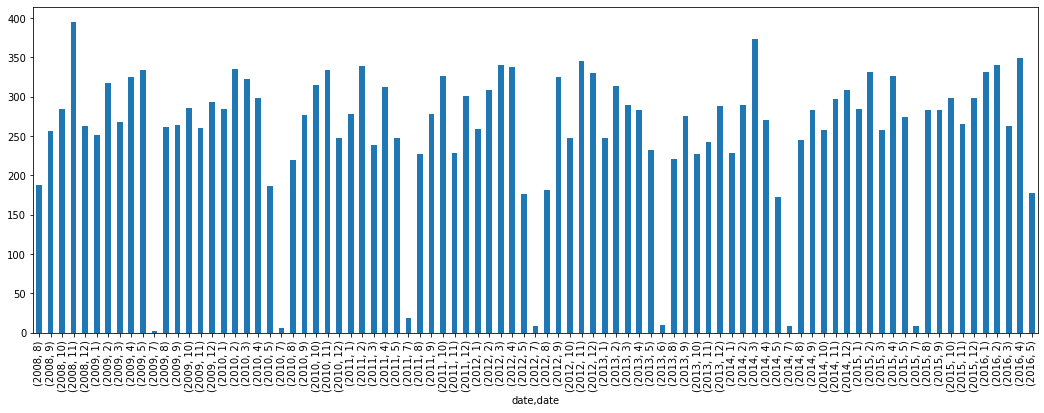

In [16]:
df["date"] = df["date"].astype("datetime64")
df.date.groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar", legend=False, figsize=(18, 6))

<AxesSubplot:xlabel='season_name'>

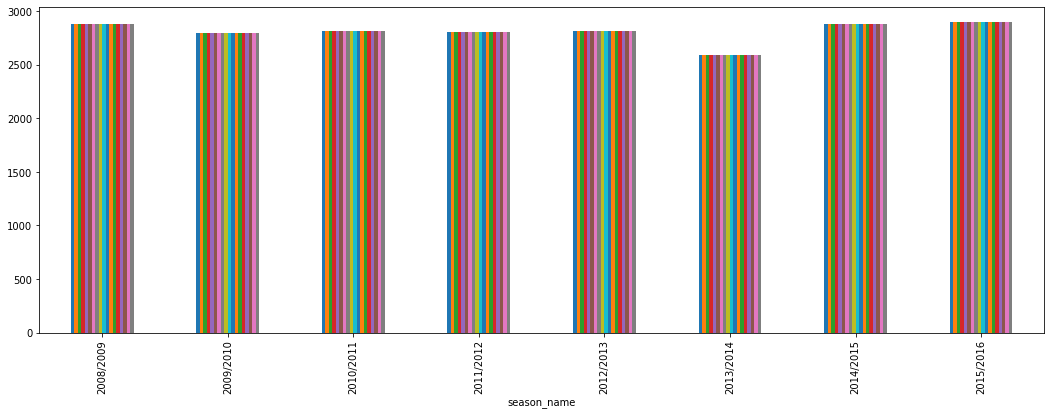

In [17]:
#Group by per season, if month is after June we move it to the next year
df.groupby('season_name').count().plot(kind="bar", legend=False, figsize=(18, 6))

<AxesSubplot:xlabel='date'>

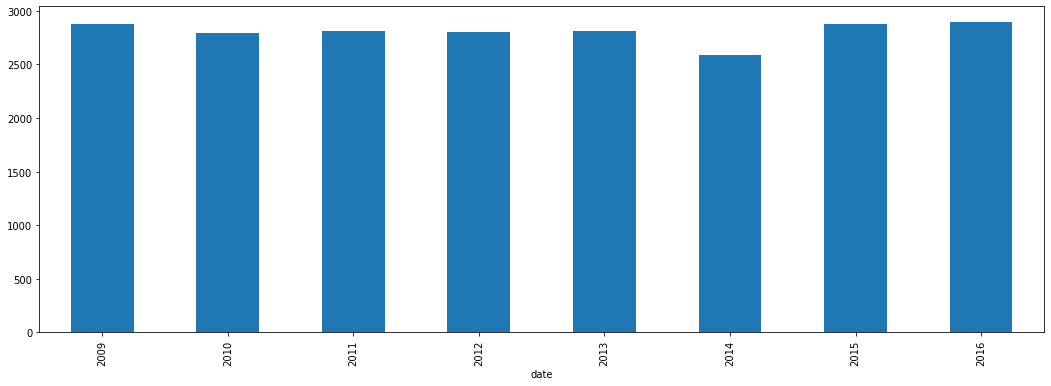

In [18]:
season_years = df["date"].dt.year + (df["date"].dt.month>6).astype(int)
df.date.groupby(season_years).count().plot(kind="bar", legend=False, figsize=(18, 6))

In [19]:
df["season"] = season_years
ta_df["date"] = ta_df["date"].astype("datetime64")
ta_df["season"] = ta_df.date.dt.year + (ta_df["date"].dt.month > 6).astype(int)

<AxesSubplot:xlabel='season'>

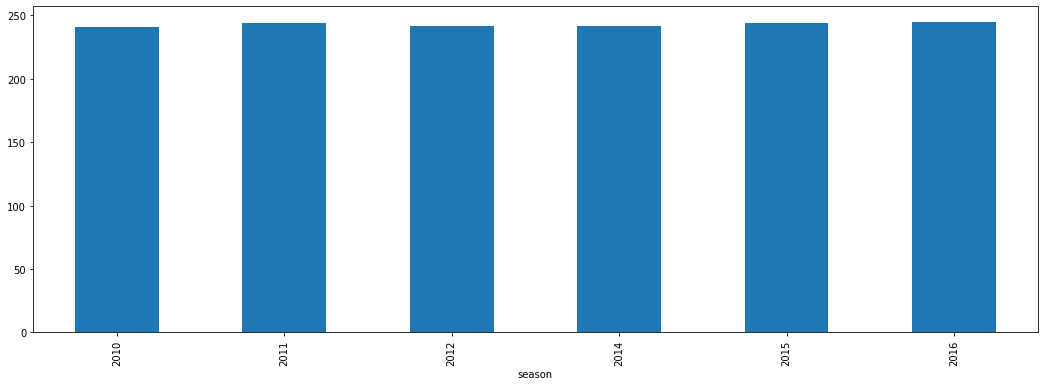

In [20]:
ta_df.season.groupby(ta_df.season).count().plot(kind="bar", legend=False, figsize=(18, 6))

Join tables on season and team_id, both for home and away teams

In [21]:
df1 = pd.merge(df, ta_df, left_on=["season", "home_team_api_id"], right_on=["season", "team_api_id"], how="inner", suffixes=("_match", "_team"))
df1.columns

Index(['id_match', 'date_match', 'season_name', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'win_lose_draw', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'season', 'id_team', 'team_api_id', 'date_team',
       'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth'],
      dtype='object')

In [22]:
df2 = pd.merge(df1, ta_df, left_on=["season", "away_team_api_id"], right_on=["season", "team_api_id"], how="inner", suffixes=("_H", "_A"))
df2.drop(
    ["match_api_id", "id_team", "team_api_id_H", "date_team", 'team_api_id_A', 'season'],
     axis=1, inplace=True)
df2.columns

Index(['id_match', 'date_match', 'season_name', 'home_team_api_id',
       'away_team_api_id', 'win_lose_draw', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'buildUpPlaySpeed_H', 'buildUpPlayPassing_H', 'chanceCreationPassing_H',
       'chanceCreationCrossing_H', 'chanceCreationShooting_H',
       'defencePressure_H', 'defenceAggression_H', 'defenceTeamWidth_H', 'id',
       'date', 'buildUpPlaySpeed_A', 'buildUpPlayPassing_A',
       'chanceCreationPassing_A', 'chanceCreationCrossing_A',
       'chanceCreationShooting_A', 'defencePressure_A', 'defenceAggression_A',
       'defenceTeamWidth_A'],
      dtype='object')

In [23]:
df2.to_csv(r'C:\Users\KL\Downloads\archive\/matches_with_team_attributes.csv', index=False)